In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fifa = pd.read_csv('fifa_data.csv')

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# **Histogram on player ratings**

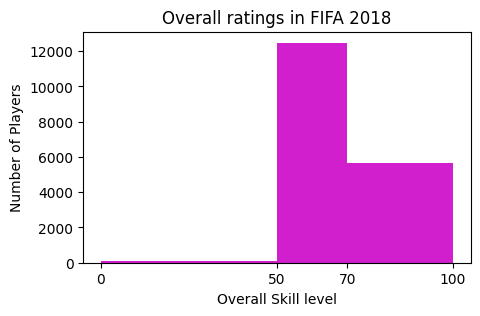

In [7]:
plt.figure(figsize=(5,3),dpi=100)
bins = [0,50,70,100]
plt.hist(fifa.Overall, bins=bins,color='#d11fce')
plt.xticks(bins)
plt.xlabel('Overall Skill level')
plt.ylabel('Number of Players')
plt.title('Overall ratings in FIFA 2018')
plt.show()

# **Pie chart on Player ratings based left and right foot**

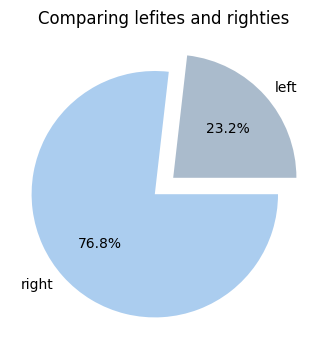

In [8]:
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[3]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[3]
plt.figure(figsize=(4,4),dpi=100)
labels =  ['left','right']
explode = (0.1,0.1)
colors = ['#aabbcc','#abcdef']
plt.pie([left,right],labels=labels,colors=colors,autopct= '%.1f%%',explode=explode)
plt.title('Comparing lefites and righties')
plt.show()

# **Pie chart based on Player weights**

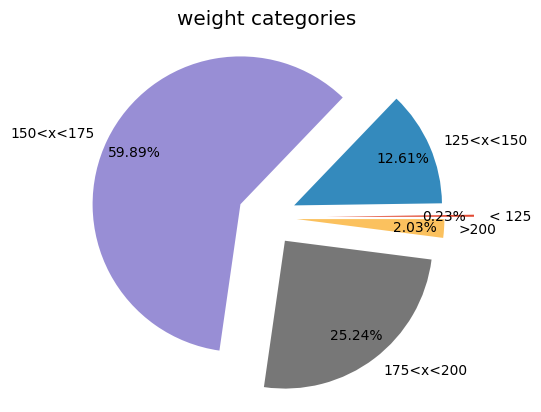

In [9]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
light = fifa.loc[fifa.Weight <125].count()[0]
light_medium = fifa.loc[(fifa.Weight >=125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >=150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >=175)&(fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >=200].count()[0]

weights= [light,light_medium,medium,medium_heavy,heavy]
labels = ['< 125','125<x<150','150<x<175','175<x<200','>200']
colors = ['#fcba03','#f0fc03','#a5fc03','#4f8d8f','#8b85c9']
plt.style.use('ggplot')
explode=(0.4,0.2,0.2,0.2,0.2)
plt.pie(weights,labels=labels,autopct='%.2f%%',pctdistance=0.8,explode=explode)
plt.title('weight categories')
plt.show()

# **BoxPLot based on comparison in professional teams**

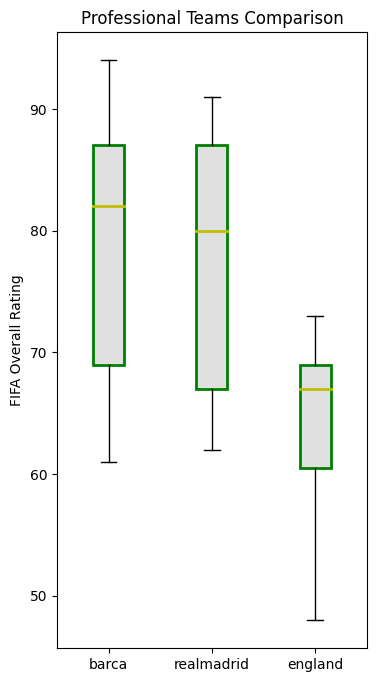

In [10]:
plt.style.use('default')
plt.figure(figsize=(4,8),dpi=100)
barca = fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
england  = fifa.loc[fifa.Club=='New England Revolution']['Overall']
labels = ['barca','realmadrid','england']

boxe= plt.boxplot([barca,madrid,england],labels=labels,patch_artist=True,medianprops={'linewidth':2,'color':'y'})
for box in boxe['boxes']:
    box.set(color='g',linewidth=2)
    box.set(facecolor='#e0e0e0')
plt.title('Professional Teams Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()

In [14]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# **Histogram on player ages**

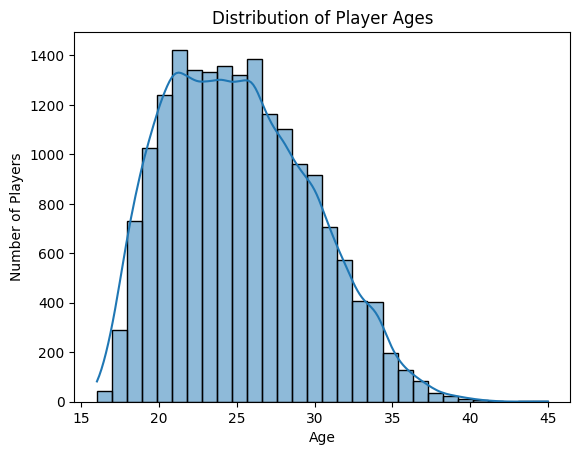

In [28]:


sns.histplot(fifa['Age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()


# **Bar chart on nationalities**

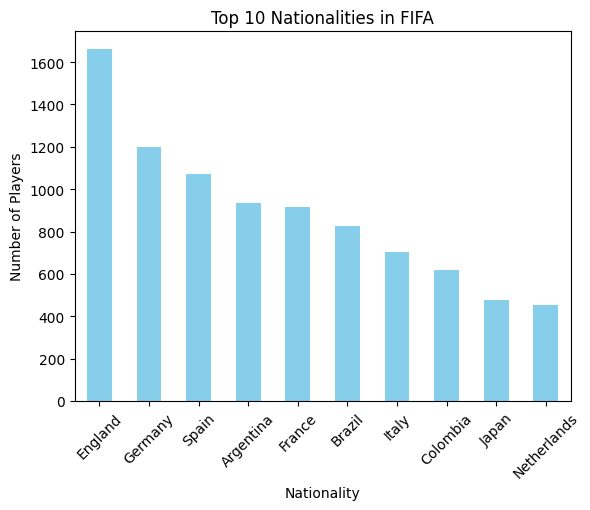

In [29]:

top_nationalities = fifa['Nationality'].value_counts().head(10)
top_nationalities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Nationalities in FIFA')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


# **Barchart on overall ratings by position**

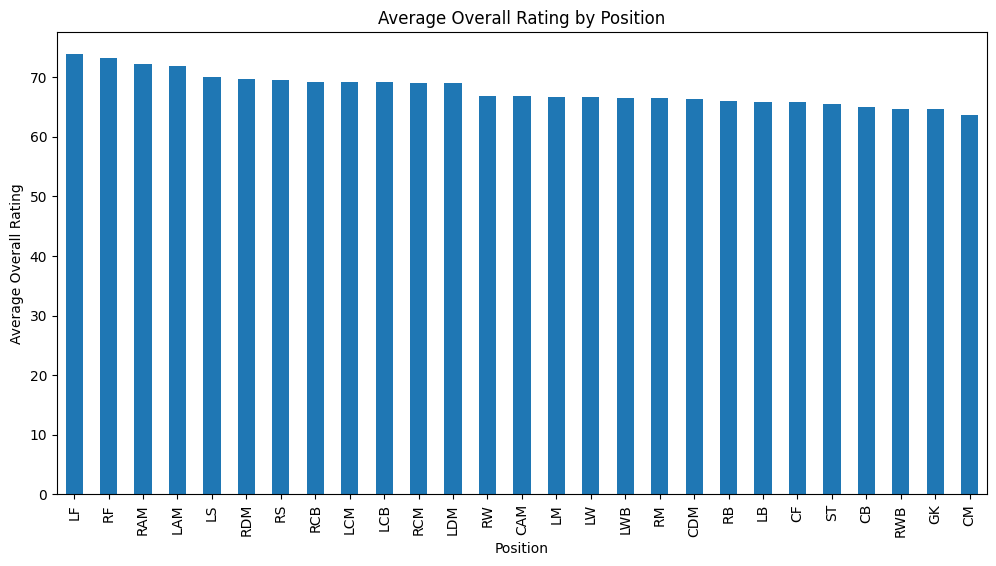

In [30]:
avg_rating_by_position = fifa.groupby('Position')['Overall'].mean().sort_values(ascending=False)

avg_rating_by_position.plot(kind='bar', figsize=(12, 6))
plt.title('Average Overall Rating by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.show()


# **Scatterplot on player value vs rating**

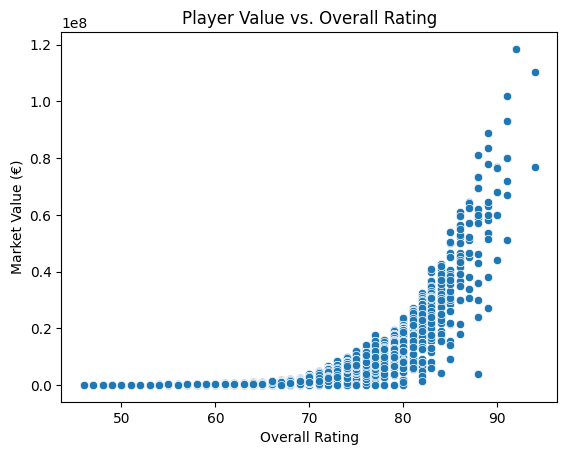

In [31]:
# Converting 'Value' from string to numeric, assuming 'Value' is like '€110.5M' or '€250K'
fifa['Value'] = fifa['Value'].replace('[€,]', '', regex=True).replace('M', 'e6', regex=True).replace('K', 'e3', regex=True).astype(float)

sns.scatterplot(x='Overall', y='Value', data=fifa)
plt.title('Player Value vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (€)')
plt.show()


# **Player wages Box plot**

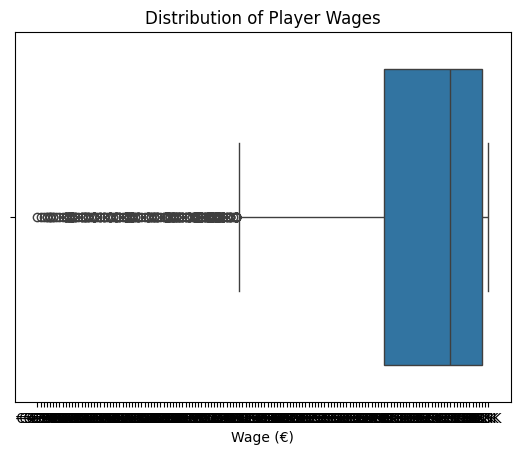

In [32]:
sns.boxplot(x=fifa['Wage'])
plt.title('Distribution of Player Wages')
plt.xlabel('Wage (€)')
plt.show()
